#### Importing required libraries

In [1]:
import polars as pl
import matplotlib.pyplot as plt

In [2]:
ratings = pl.read_csv('data/raw/jester_ratings.csv')

ratings.head()

userId,jokeId,rating
i64,i64,f64
1,5,0.219
1,7,-9.281
1,8,-9.281
1,13,-6.781
1,15,0.875


In [3]:
ratings.describe()

describe,userId,jokeId,rating
str,f64,f64,f64
"""count""",385832.0,385832.0,385832.0
"""null_count""",0.0,1.0,1.0
"""mean""",6701.419965,69.888433,1.445558
"""std""",4518.070754,46.155472,5.618196
"""min""",1.0,5.0,-10.0
"""max""",14780.0,150.0,10.0
"""median""",6178.0,68.0,2.125
"""25%""",2515.0,19.0,-2.781
"""75%""",10768.0,112.0,5.969


In [4]:
ratings = ratings.drop_nulls()

In [5]:
items = pl.read_csv('data/raw/jester_items.csv')

items.head()

jokeId,jokeText
i64,str
1,"""A man visits t…"
2,"""This couple ha…"
3,"""Q. What's 200 …"
4,"""Q. What's the …"
5,"""Q. What's O. J…"


In [6]:
items.describe()

describe,jokeId,jokeText
str,f64,str
"""count""",150.0,"""150"""
"""null_count""",0.0,"""0"""
"""mean""",75.5,null
"""std""",43.445368,null
"""min""",1.0,""" President Cli…"
"""max""",150.0,"""Why are there …"
"""median""",75.5,null
"""25%""",38.0,null
"""75%""",113.0,null


### Distribution of ratings

In [7]:
ratings['rating'].describe()

statistic,value
str,f64
"""count""",385831.0
"""null_count""",0.0
"""mean""",1.445558
"""std""",5.618196
"""min""",-10.0
"""max""",10.0
"""median""",2.125
"""25%""",-2.781
"""75%""",5.969


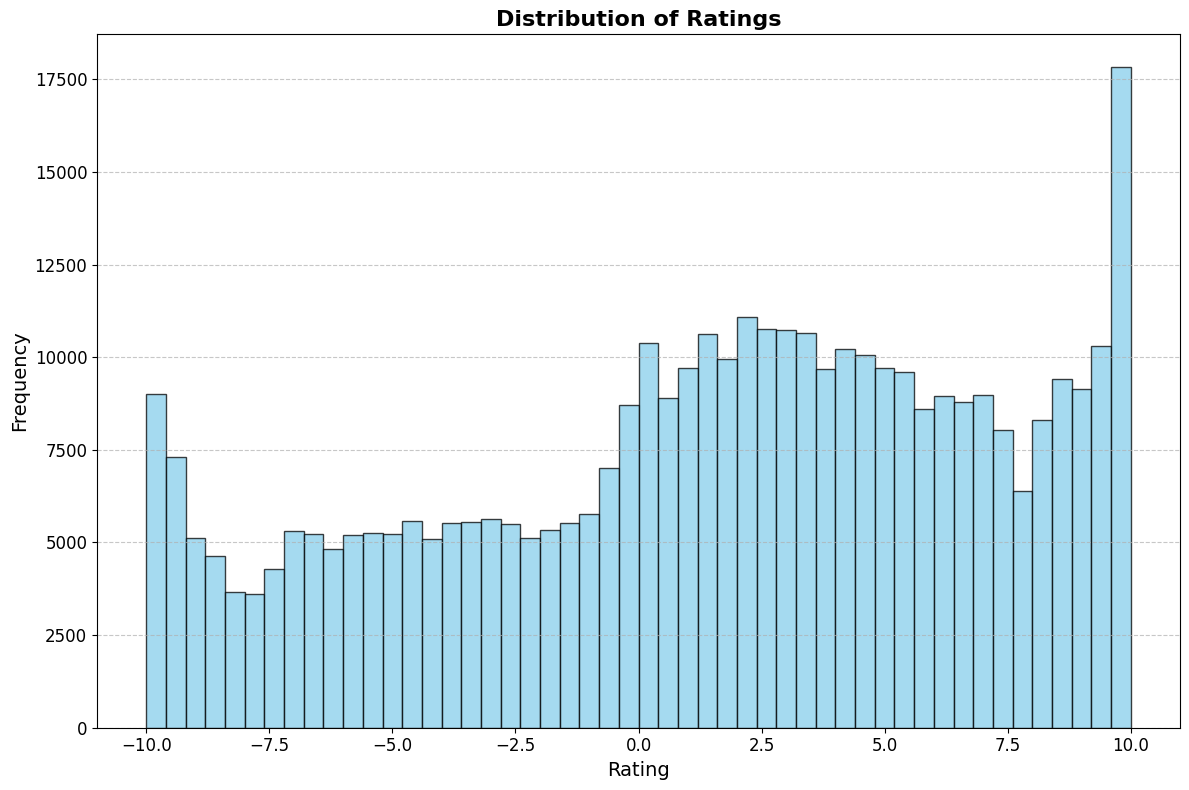

In [8]:
plt.figure(figsize=(12, 8))  # Increased size for better readability
plt.hist(
    ratings['rating'], 
    bins=50, 
    edgecolor='black', 
    alpha=0.75, 
    color='skyblue'
)  # Updated color and aesthetics
plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')  # Clear, bold title
plt.xlabel('Rating', fontsize=14)  # Enhanced label readability
plt.ylabel('Frequency', fontsize=14)  # Changed 'Count' to 'Frequency' for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added grid for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Distribution of number of ratings per user

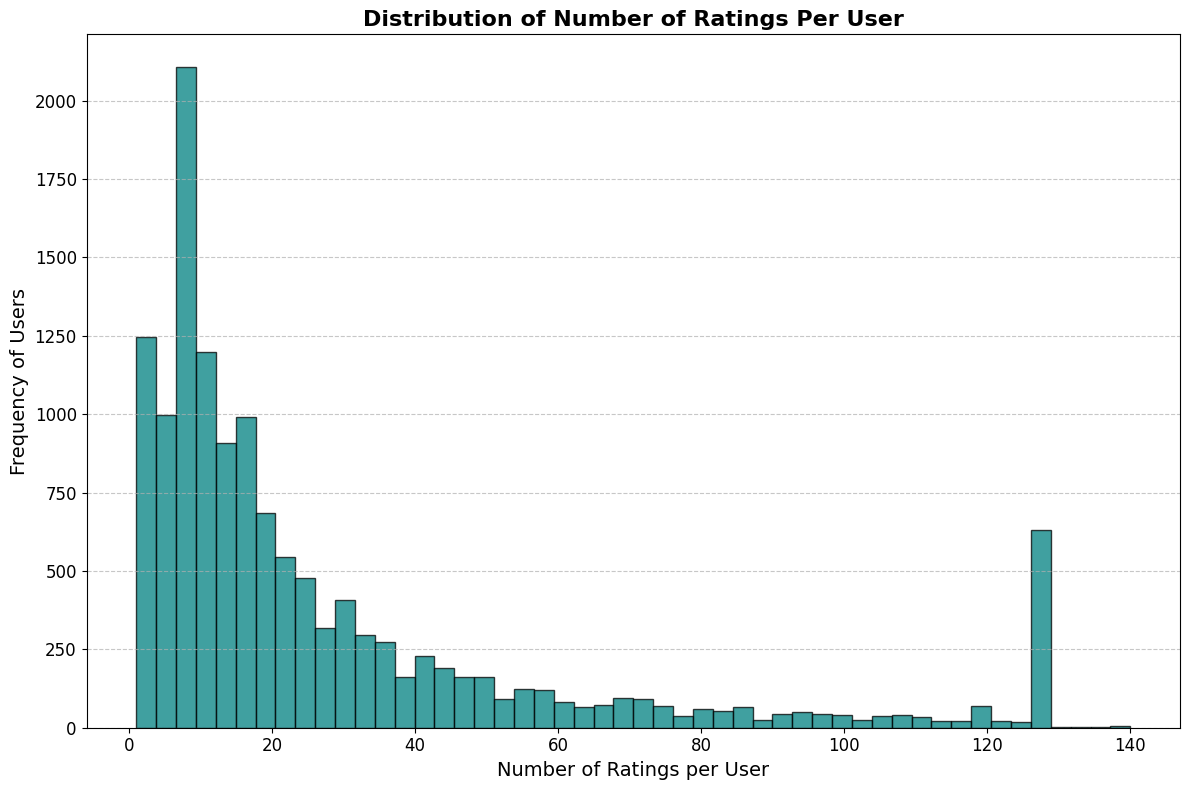

In [12]:
user_ratings = ratings.groupby("userId").agg(pl.count("jokeId").alias("num_ratings"))

plt.figure(figsize=(12, 8))  # Larger figure for better visualization
plt.hist(
    user_ratings["num_ratings"], 
    bins=50, 
    edgecolor='black', 
    alpha=0.75, 
    color='teal'
)  # Changed color to teal for a professional look
plt.title('Distribution of Number of Ratings Per User', fontsize=16, fontweight='bold')  # Clear and bold title
plt.xlabel('Number of Ratings per User', fontsize=14)  # Detailed x-axis label
plt.ylabel('Frequency of Users', fontsize=14)  # Changed y-axis label to emphasize frequency
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added horizontal gridlines for readability
plt.xticks(fontsize=12)  # Adjusted tick font size for clarity
plt.yticks(fontsize=12)
plt.tight_layout()  # Prevent layout issues
plt.show()

In [13]:
top_users = user_ratings.sort("num_ratings", descending=True).head(10)

top_users

userId,num_ratings
i64,u32
304,140
476,140
477,140
701,140
227,140
442,139
46,136
410,132
159,132


In [14]:
joke_ratings = ratings.groupby("jokeId").agg(pl.count("userId").alias("num_ratings"))
joke_avg_rating = ratings.groupby("jokeId").agg(pl.col("rating").mean().alias("avg_rating"))

joke_insights = joke_ratings.join(joke_avg_rating, on="jokeId").join(items, on="jokeId")

### Top 10 highest-rated jokes

In [15]:
highest_rated_jokes = joke_insights.sort("avg_rating", descending=True).head(10)
highest_rated_jokes

jokeId,num_ratings,avg_rating,jokeText
i64,u32,f64,str
32,4278,3.746336,"""A man arrives …"
105,4044,3.67475,"""A couple of hu…"
35,3975,3.590297,"""An explorer in…"
53,4501,3.583019,"""One Sunday mor…"
89,5025,3.558292,"""A radio conver…"
129,3739,3.462054,"""A group of gir…"
72,3745,3.435235,"""On the first d…"
104,3348,3.289265,"""As a pre-med s…"
127,4229,3.285332,"""A little boy g…"


In [16]:
for i, joke in enumerate(highest_rated_jokes['jokeText'], start=1):
    print(f"{i}. {joke}\n")

1. A man arrives at the gates of heaven. St. Peter asks, "Religion?" 
The man says, "Methodist." St. Peter looks down his list, and says, 
"Go to room 24, but be very quiet as you pass room 8." 

Another man arrives at the gates of heaven. "Religion?"
"Baptist." "Go to room 18, but be very quiet as you pass room 8." 

A third man arrives at the gates. "Religion?" "Jewish."
"Go to room 11, but be very quiet as you pass room 8." 
The man says, "I can understand there being different rooms for different religions, but why
must I be quiet when I pass room 8?" St. Peter tells him, "Well the Catholics are in room 8, 
and they think they're the only ones here.


2. A couple of hunters are out in the woods in the deep south when one of them falls to the ground. He doesn't seem to be breathing, and his eyes are rolled back in his head. The other guy whips out his cell phone and calls 911. He gasps to the operator, "My friend is dead! What can I do?" The operator, in a calm and soothing voice, s

### Top 10 most-rated jokes


In [17]:
most_rated_jokes = joke_insights.sort("num_ratings", descending=True).head(10)
most_rated_jokes

jokeId,num_ratings,avg_rating,jokeText
i64,u32,f64,str
7,13500,-2.525941,"""How many femin…"
8,13083,-1.219098,"""Q. Did you hea…"
13,12672,-0.902732,"""They asked the…"
15,12250,-1.672583,"""Q: What did t…"
16,12037,-1.958497,"""Q. What is ora…"
17,11810,0.96712,"""How many men d…"
18,11246,-0.319374,"""A dog walks in…"
19,11004,1.362581,"""Q: If a person…"
114,5135,2.934289,"""Sherlock Holme…"


In [18]:
for i, joke in enumerate(most_rated_jokes['jokeText'], start=1):
    print(f"{i}. {joke}\n")

1. How many feminists does it take to screw in a light bulb?
That's not funny.


2. Q. Did you hear about the dyslexic devil worshiper? 

A. He sold his soul to Santa.


3. They asked the Japanese visitor if they have elections in his
country.  
"Every Morning" he answers.


4. Q:  What did the blind person say when given some matzah?

A:  Who the hell wrote this?


5. Q. What is orange and sounds like a parrot?  

A. A carrot.


6. How many men does it take to screw in a light bulb? 

One...men will screw anything. 


7. A dog walks into Western Union and asks the clerk to send a telegram. He fills out a form on which he
writes down the telegram he wishes to send: "Bow wow wow, Bow wow wow."

The clerk says, "You can add another 'Bow wow' for the same price."

The dog responded, "Now wouldn't that sound a little silly?" 


8. Q: If a person who speaks three languages is called "tri-lingual," and
a person who speaks two languages is called "bi-lingual," what do call
a person who only s

### Plot of Average Rating vs Number of Ratings

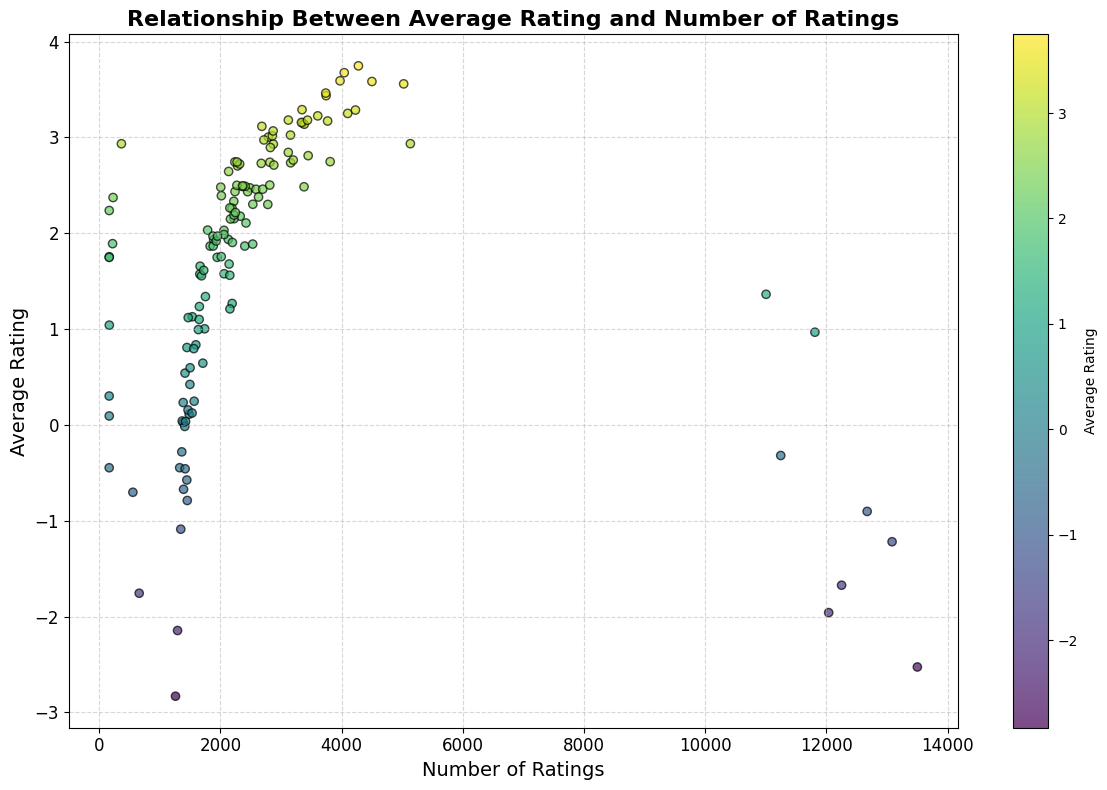

In [19]:
plt.figure(figsize=(12, 8))  # Larger figure size for clarity
plt.scatter(
    joke_insights["num_ratings"], 
    joke_insights["avg_rating"], 
    alpha=0.7, 
    c=joke_insights["avg_rating"], 
    cmap="viridis", 
    edgecolor='black'
)  # Added a colormap for visual impact
plt.title('Relationship Between Average Rating and Number of Ratings', fontsize=16, fontweight='bold')  # Detailed and bold title
plt.xlabel('Number of Ratings', fontsize=14)  # Clearer x-axis label
plt.ylabel('Average Rating', fontsize=14)  # Clearer y-axis label
plt.colorbar(label='Average Rating', orientation='vertical')  # Added color bar for context
plt.grid(alpha=0.5, linestyle='--')  # Subtle gridlines for readability
plt.xticks(fontsize=12)  # Adjusted font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjusted font size for y-axis ticks
plt.tight_layout()  # Ensures proper spacing and no clipping
plt.show()

### Distribution of text length

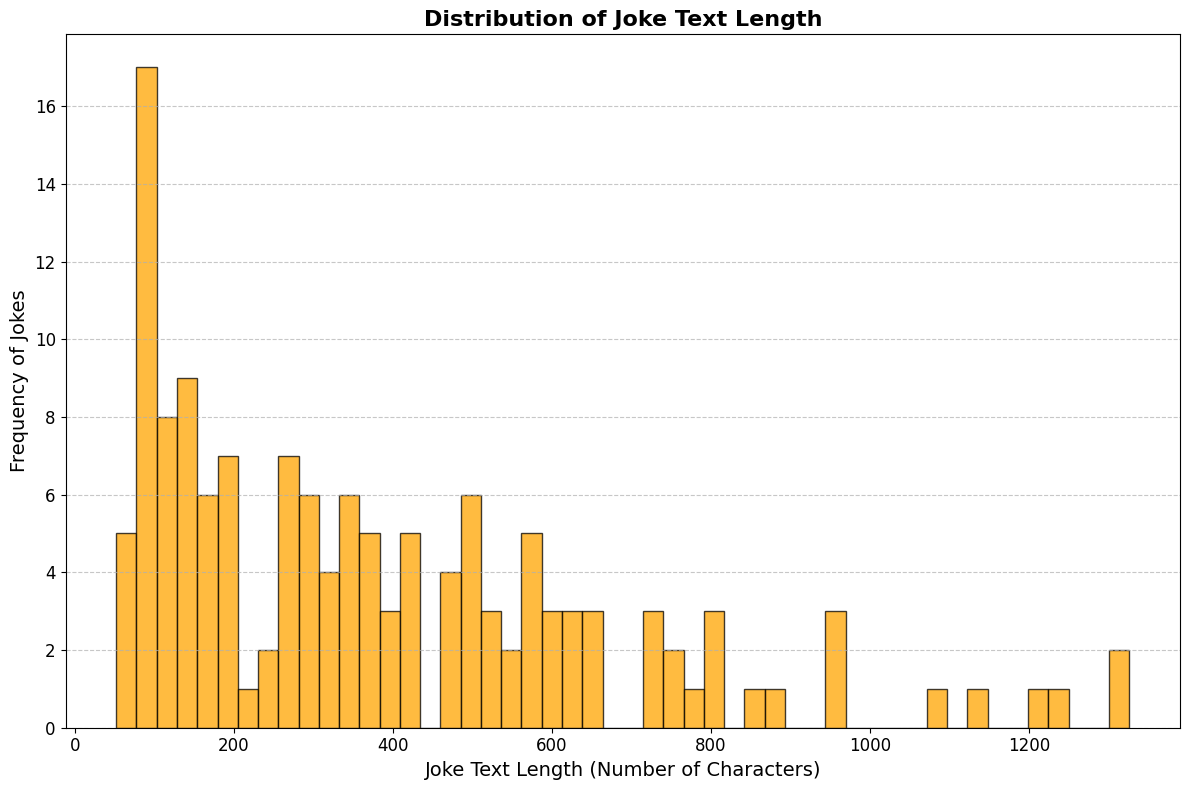

In [21]:
joke_insights = joke_insights.with_columns(
    pl.col("jokeText").apply(len).alias("text_length")
)

plt.figure(figsize=(12, 8))  # Larger figure for better readability
plt.hist(
    joke_insights["text_length"], 
    bins=50, 
    edgecolor='black', 
    alpha=0.75, 
    color='orange'
)  # Changed color for a visually warm and engaging palette
plt.title('Distribution of Joke Text Length', fontsize=16, fontweight='bold')  # Bold and descriptive title
plt.xlabel('Joke Text Length (Number of Characters)', fontsize=14)  # Detailed x-axis label
plt.ylabel('Frequency of Jokes', fontsize=14)  # Updated y-axis label for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added horizontal gridlines for readability
plt.xticks(fontsize=12)  # Adjusted font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjusted font size for y-axis ticks
plt.tight_layout()  # Prevents label clipping and ensures proper spacing
plt.show()

### Plot of Length of Joke vs Average Rating

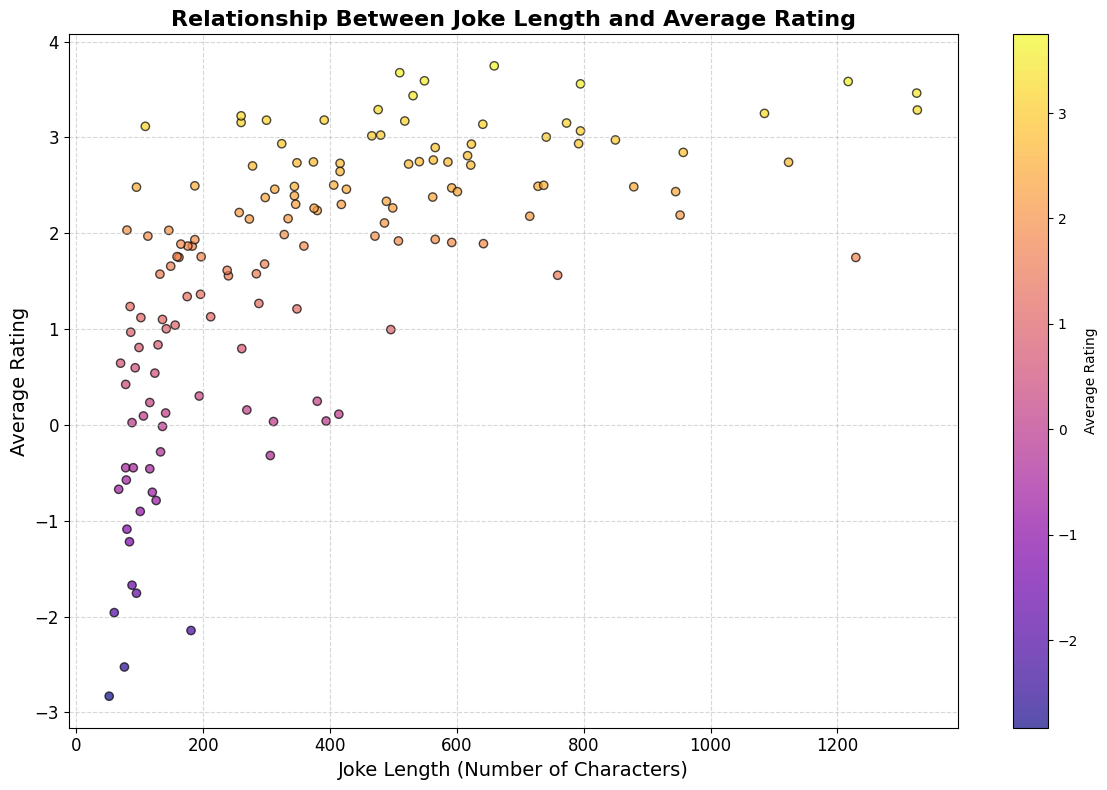

In [23]:
plt.figure(figsize=(12, 8))  # Larger figure size for better visibility
plt.scatter(
    joke_insights["text_length"], 
    joke_insights["avg_rating"], 
    alpha=0.7, 
    c=joke_insights["avg_rating"], 
    cmap="plasma", 
    edgecolor="black"
)  # Added color mapping for visual appeal
plt.title('Relationship Between Joke Length and Average Rating', fontsize=16, fontweight='bold')  # Expanded title
plt.xlabel('Joke Length (Number of Characters)', fontsize=14)  # Detailed x-axis label
plt.ylabel('Average Rating', fontsize=14)  # Clear and descriptive y-axis label
plt.colorbar(label='Average Rating', orientation='vertical')  # Added color bar for context
plt.grid(alpha=0.5, linestyle='--')  # Subtle gridlines for readability
plt.xticks(fontsize=12)  # Adjusted font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjusted font size for y-axis ticks
plt.tight_layout()  # Ensures all elements are properly spaced
plt.show()